In [1]:

import tensorflow as tf

# Your TensorFlow code here
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import clone_model
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from numpy.random import default_rng
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

2024-10-28 11:14:34.914376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 11:14:34.924440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 11:14:34.935592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 11:14:34.939081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 11:14:34.948472: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_images.shape

(50000, 32, 32, 3)

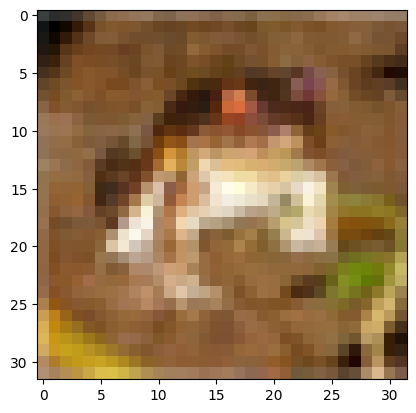

In [5]:
plt.imshow(train_images[0])

In [6]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

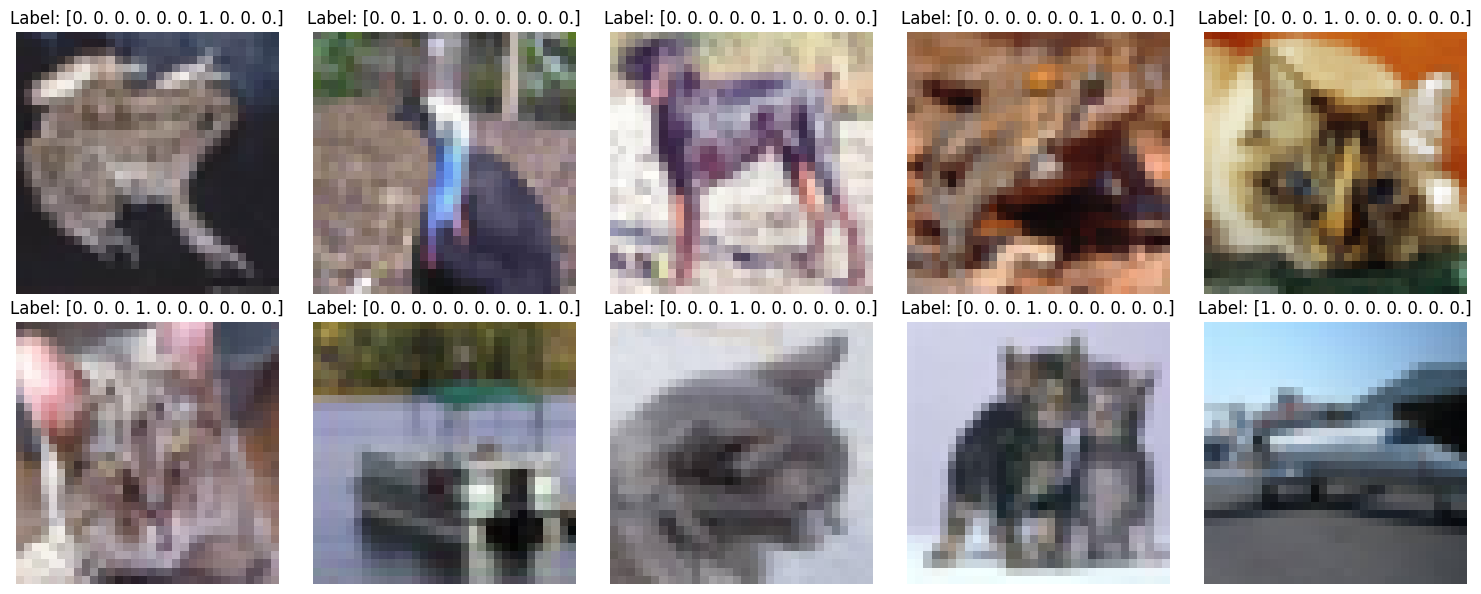

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for img, lbl, ax in zip(train_images, train_labels, axes):
    ax.imshow(img)
    ax.set_title(f'Label: {lbl}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam



In [10]:
'''model_list = []

for i in range(10):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), name='conv1'),
        MaxPooling2D((2,2), name='pool1'),
        Conv2D(64, (3,3), activation='relu', name='conv2'),
        MaxPooling2D((2,2), name='pool2'),
        Conv2D(64, (3,3), activation='relu', name='conv3'),
        Flatten(name='flatten'),
        Dense(64, activation='relu', name='fc1'),
        Dense(10, activation='softmax', name='output')
        ])
    model_list.append(model)'''
model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), name='conv1'),
        MaxPooling2D((2,2), name='pool1'),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu', padding='same', name='conv2'),
        MaxPooling2D((2,2), name='pool2'),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu', padding='same',  name='conv3'),
        MaxPooling2D((2,2), name='pool3'),
        Dropout(0.25),
        Conv2D(128, (3,3), activation='relu', padding='same',  name='conv4'),
        MaxPooling2D((2,2), name='pool4'),
        Dropout(0.25),
        #Conv2D(128, (3,3), activation='relu', padding='same', name='conv5'),
        Flatten(name='flatten'),
        Dense(64, activation='relu', name='fc1'),
        Dense(10, activation='softmax', name='output')
        ])

/home/am/Documents/VirtualEnv/tensorflow_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730081678.455307 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730081678.476141 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:173008167

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,658 (639.29 KB)

 Trainable params: 163,658 (639.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def get_flops(model, input_shape):
    # Create a concrete function from the Keras model
    @tf.function
    def model_func(x):
        return model(x)
    
    # Get the concrete function
    concrete_func = model_func.get_concrete_function(tf.TensorSpec(input_shape, model.inputs[0].dtype))
    
    # Convert variables to constants and get the frozen graph
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    frozen_graph = frozen_func.graph.as_graph_def()
    
    # Use TensorFlow's profiler
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(frozen_graph, name='')
        run_meta = tf.compat.v1.RunMetadata()
        with tf.compat.v1.Session(graph=graph) as sess:
            flops = tf.compat.v1.profiler.profile(
                graph=graph,
                run_meta=run_meta,
                cmd='op',
                options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
            )
            return flops.total_float_ops

In [13]:
'''for i in model_list:
    i.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    i.fit(X, y_one_hot, epochs=100, batch_size=2)
    loss_list.append(i.evaluate(X, y_one_hot)[0])
    accuracy_list.append(i.evaluate(X, y_one_hot)[1])'''
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/100


I0000 00:00:1730081680.533286 1053928 service.cc:146] XLA service 0x7b3b9400f370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730081680.533302 1053928 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-28 11:14:40.557649: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 11:14:40.693439: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-28 11:14:40.876952: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 96/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1427 - loss: 2.2579

I0000 00:00:1730081683.182604 1053928 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2603 - loss: 1.9730 - val_accuracy: 0.4574 - val_loss: 1.4778
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 1.4488 - val_accuracy: 0.5599 - val_loss: 1.2248
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5338 - loss: 1.2774 - val_accuracy: 0.6080 - val_loss: 1.1046
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5853 - loss: 1.1612 - val_accuracy: 0.6374 - val_loss: 1.0421
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6151 - loss: 1.0781 - val_accuracy: 0.5984 - val_loss: 1.1226
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6354 - loss: 1.0245 - val_accuracy: 0.6803 - val_loss: 0.9143
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6505 - loss: 0.9791 - val_accuracy: 0.6985 - val_loss: 0.8653
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6662 - loss: 0.9482 - val_accuracy: 0.7063

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - 2ms/step - accuracy: 0.7955 - loss: 0.6111


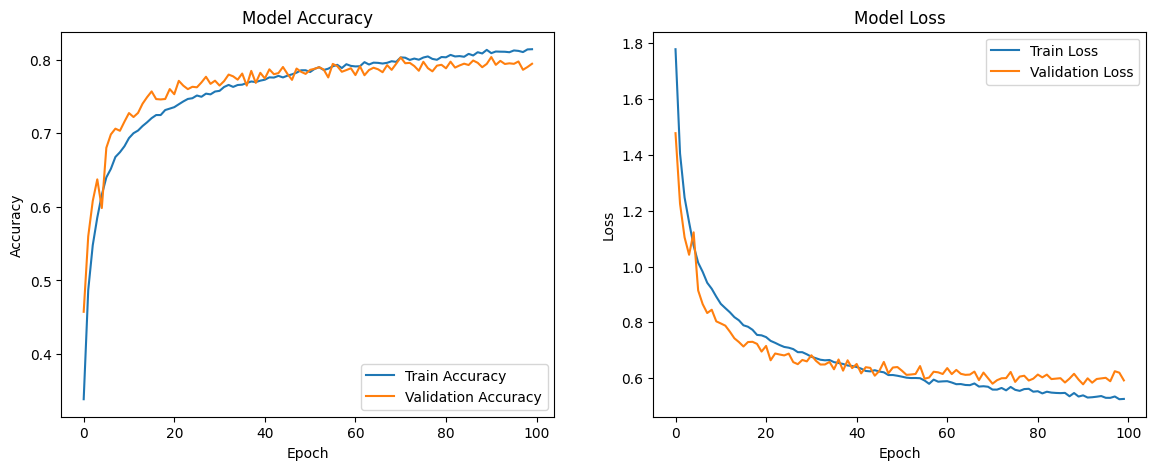

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


In [16]:
#for idx, model in enumerate(model_list):
#    model.save(f'model_{idx}.h5')
get_flops(model, train_images.shape)

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation ker

I0000 00:00:1730081808.813507 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730081808.813665 1053267 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-10-28 11:16:48.813710: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
I0000 00:00:1730081808.813893 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730081808.813978 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so

738483040000

In [17]:
def get_layer(model, layer_index):
    return [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][layer_index]

def get_filters(model, layer_index, filter_indices):
    layer = get_layer(model, layer_index)
    filters, biases = layer.get_weights()
    return filters[:, :, :, filter_indices]

In [18]:
'''def norms(model_index, layer_index, model_list):    
    model_norm_list = []
    for model_idx, model in enumerate(model_list):
        #print(model_idx)
        layer_norm_list = []
        for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):
            #print(layer_idx)
            norm_list = []
            filters, biases = layer.get_weights()
            num_filters = filters.shape[-1]
            for i in range(num_filters):
                
                filt = filters[:, :, :, i]
                filt_matrix = filt.reshape(-1, filt.shape[-1])
                norm = np.linalg.norm(filt_matrix)
                norm_list.append(norm)
            layer_norm_list.append(norm_list)
        model_norm_list.append(layer_norm_list)
    return model_norm_list[model_index][layer_index]'''

def get_norm(model, layer_name):
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()
    num_filters = filters.shape[-1]
    norms = []
    for i in range(num_filters):
        filt = filters[:, :, :, i]
        filt_matrix = filt.reshape(-1, filt.shape[-1])
        norm = np.linalg.norm(filt_matrix)
        norms.append(norm)
    return norms

norm_conv2 = get_norm(model, 'conv2')
norm_conv3 = get_norm(model, 'conv3')
norm_conv4 = get_norm(model, 'conv4')

    
            

In [19]:
def filter_to_zero(norms, percentage):
    threshold = np.percentile(norms, percentage)
    return [i for i, norm in enumerate(norms) if norm < threshold]

def filter_to_keep(norms, percentage):
    threshold = np.percentile(norms, percentage)
    return [i for i, norm in enumerate(norms) if norm >= threshold]

Set insignificant filters elements to 0, doesnt reduce FLOPS XD



In [20]:
'''for model_idx, model in enumerate(model_list):
    for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):
        w, b = layer.get_weights()
        w[:, :, :, filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0
        b[filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0
        layer.set_weights([w, b])'''

'for model_idx, model in enumerate(model_list):\n    for layer_idx, layer in enumerate([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]):\n        w, b = layer.get_weights()\n        w[:, :, :, filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0\n        b[filter_to_zero(norms(model_idx, layer_idx, model_list), 85)] = 0\n        layer.set_weights([w, b])'

Try to remove some entirely the insignificant filters

In [21]:
keep_filt_conv2 = filter_to_keep(norm_conv2, 90)
keep_filt_conv3 = filter_to_keep(norm_conv3, 60)
keep_filt_conv4 = filter_to_keep(norm_conv4, 90)

In [22]:
keep_filt_conv3

[1,
 3,
 4,
 7,
 8,
 12,
 19,
 23,
 24,
 26,
 27,
 30,
 32,
 35,
 40,
 41,
 43,
 45,
 46,
 51,
 52,
 54,
 57,
 60,
 61,
 62]

In [23]:
'''pruned_target_model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:], name='target_conv1'),
        MaxPooling2D((2,2), name='target_pool1'),
        Conv2D(len(keep_filt), (3,3), activation='relu', name='target_conv2'),
        MaxPooling2D((2,2), name='target_pool2'),
        Flatten(name='target_flatten'),
        Dense(len(keep_filt), activation='relu', name='target_fc1'),
        Dense(10, activation='softmax', name='target_output')
        ])'''

pruned_target_model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), name='conv1'),
        MaxPooling2D((2,2), name='pool1'),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu', padding='same', name='conv2'),
        MaxPooling2D((2,2), name='pool2'),
        Dropout(0.25),
        Conv2D(len(keep_filt_conv3), (3,3), activation='relu', padding='same',  name='conv3'),
        MaxPooling2D((2,2), name='pool3'),
        Dropout(0.25),
        Conv2D(len(keep_filt_conv4), (3,3), activation='relu', padding='same',  name='conv4'),
        MaxPooling2D((2,2), name='pool4'),
        Dropout(0.25),
        #Conv2D(128, (3,3), activation='relu', padding='same', name='conv5'),
        Flatten(name='flatten'),
        Dense(len(keep_filt_conv4), activation='relu', name='fc1'),
        Dense(10, activation='softmax', name='output')
        ])

In [24]:
pruned_target_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 26)       │        15,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 26)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 26)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 4, 4, 13)       │         3,055 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 2, 2, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 13)             │           689 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,278 (149.52 KB)

 Trainable params: 38,278 (149.52 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
'''def copy_weights_pruned(source_model, pruned_target_model, source_layer_name, target_layer_name):
    for source_layer, target_layer in zip(source_model.layers, pruned_target_model.layers):
        if isinstance(source_layer, tf.keras.layers.Conv2D) and source_layer.name != source_layer_name and target_layer.name != target_layer_name:
            w, b = source_layer.get_weights()
            target_layer.set_weights([w, b])
        elif source_layer.name == source_layer_name and target_layer.name == target_layer_name:
            w, b = source_layer.get_weights()
            target_layer.set_weights([w[:, :, :, keep_filt], b[keep_filt]])'''
def get_var_name(var):
    for name, value in locals().items():
        if value is var:
            return name

def copy_weights_pruned(source_model, pruned_target_model, source_layer_names, target_layer_names, keep_filters):
    for source_layer, target_layer in zip(source_model.layers, pruned_target_model.layers):
        if isinstance(source_layer, tf.keras.layers.Conv2D) and source_layer.name not in source_layer_names and target_layer.name not in target_layer_names:
            w, b = source_layer.get_weights()
            target_layer.set_weights([w, b])
        elif source_layer.name in source_layer_names and target_layer.name in target_layer_names:
            for keep_filt in keep_filters:
                if source_layer.name in get_var_name(keep_filt):
                    w, b = source_layer.get_weights()
                    target_layer.set_weights([w[:, :, :, keep_filt], b[keep_filt]])
               
        

In [26]:
copy_weights_pruned(model, pruned_target_model, [ 'conv3', 'conv4'], [ 'conv3', 'conv4'], [ keep_filt_conv3, keep_filt_conv4])

In [27]:
pruned_target_model.get_layer('conv3').get_weights()[0].shape

(3, 3, 64, 26)

In [28]:
pruned_target_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = pruned_target_model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2565 - loss: 1.9634 - val_accuracy: 0.5626 - val_loss: 1.2565
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5111 - loss: 1.3192 - val_accuracy: 0.6276 - val_loss: 1.0594
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5755 - loss: 1.1863 - val_accuracy: 0.6553 - val_loss: 1.0000
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6052 - loss: 1.0982 - val_accuracy: 0.6721 - val_loss: 0.9420
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6182 - loss: 1.0683 - val_accuracy: 0.6697 - val_loss: 0.9494
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6310 - loss: 1.0278 - val_accuracy: 0.6910 - val_loss: 0.8964
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6342 - loss: 1.0256 - val_accuracy: 0.6881 - val_loss: 0.8867
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6493 - loss: 0.9950 - val_accu

In [29]:
test_loss, test_acc = pruned_target_model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - 2ms/step - accuracy: 0.7451 - loss: 0.7354


In [30]:
get_flops(pruned_target_model, train_images.shape)


=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D. Graph nodes belonging to the same type are aggregated together.
flops: Number of float operations. Note: Please read the implementation for th

I0000 00:00:1730081923.591640 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730081923.591720 1053267 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-10-28 11:18:43.591767: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
I0000 00:00:1730081923.591998 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730081923.592089 1053267 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so

532986440000

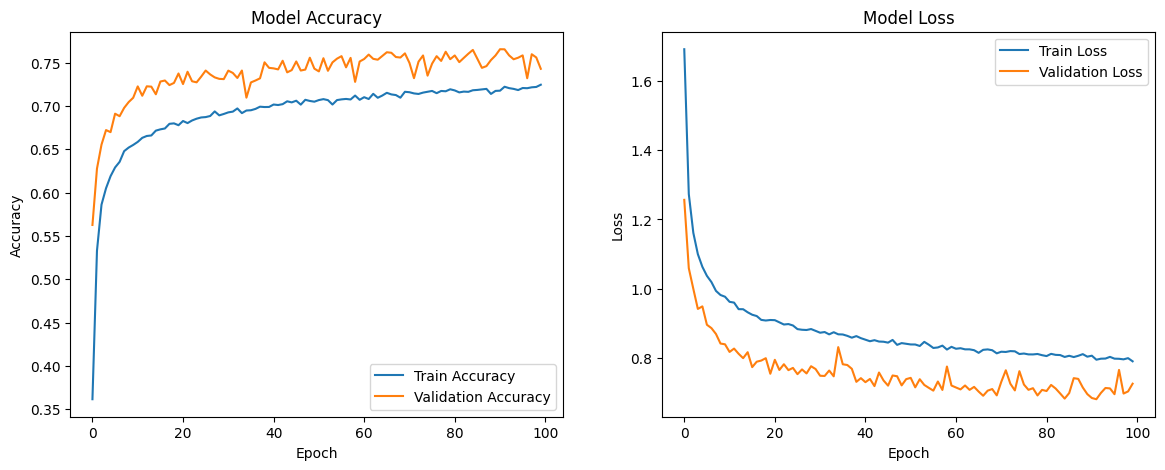

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


In [32]:
model.save('model.h5')
pruned_target_model.save('pruned_target_model.h5')